# ***WEB SCRAPING***:Extracting  Data to create a Weather Dataset
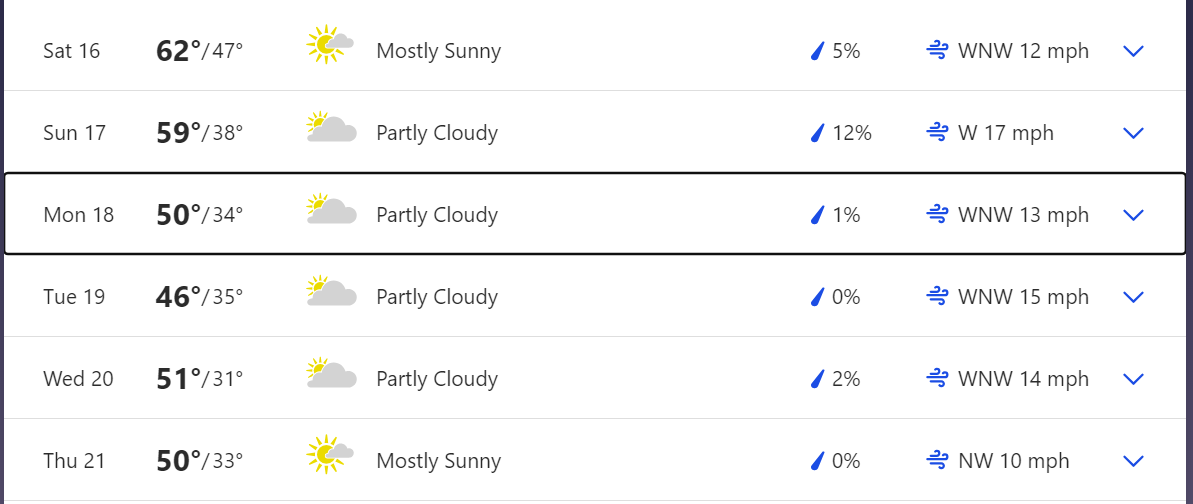

IMPORT YOUR LIBRARIES

In [6]:
from bs4 import BeautifulSoup as bf
import requests
import pandas as pd
import numpy as np
import datetime as dt

REQUESTING DATA FROM THE WEB ADDRESS AND CHECKING THE STATUS CODE

In [7]:
#Our web address is assigned to a variable called url
url = 'https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100'
#we implementt the requests.get() method to fetch all details about our web page and assign to the resppnse variable
response = requests.get(url)
#All responses from a get() method have status codes to indicate what was contained in the feedback
#Examples: Code 200:OK, 404:Page Not Found 503:Server error etc.
print(response.status_code)

200


INSPECTING/FORMATTING OUR RESPONSE CONTENT AND ADDIGN TO A VARIABLE USING BEAUTIFUL SOUP

In [8]:
#We fetch the content of our response and inspect/format it with the html parser
#assign to the variable soup
soup = bf(response.content,'html.parser')
#soup

In [4]:
#Remember the 2 main tags within our html document is th head and body
#Our focus for this exercise however is the body so we assign that to a varaible
body=soup.body
#Uncomment the code below to view html for the body
print(body.prettify())

<body class="archive post-type-archive post-type-archive-review_airline js-legacy-header" data-rsssl="1">
 <!--
<div class="off-canvas-wrap" data-offcanvas>
    <div class="inner-wrap">
-->
 <div id="container">
  <header class="header header--legacy" role="banner">
   <div id="inner-header">
    <div class="top" id="mainMenu">
     <div class="brand-logo">
      <a href="https://www.airlinequality.com" rel="nofollow">
       <img alt="SKYTRAX" onerror="this.src='https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/skytrax.png'" src="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/skytrax.svg"/>
      </a>
      <small>
       Air Travel Ratings &amp; Reviews | Airline Rating and Reviews | Airport Rating and Reviews | Seat Reviews
      </small>
     </div>
     <div class="menu-container">
      <div class="gcs-input nav-search">
       <div class="gcs-input">
        <form action="/search " class="custom_search_fo

EXTRACTING DATA TO CREATE OUR DATAFRAME

###DATES###

In [5]:
# <span class="DailyContent--daypartDate--3VGlz">
#  Mon 18
# </span>
#From our inspection we realized Mon 18 together with all dates are found in the span tag with class vale of DailyContent--daypartDate--3VGlz"
#We extract all such vales with the body.find_all function
date_headers = body.find_all('span', class_='DailyContent--daypartDate--3VGlz')
date_headers

[]

In [ ]:
#we further extract the data from the tags with th code below and assign to a list
forecast_date= [datestr.text for datestr in date_headers]
forecast_date
#however, we eralize there are some duplicates in our list

['Fri 15',
 'Sat 16',
 'Sat 16',
 'Sun 17',
 'Sun 17',
 'Mon 18',
 'Mon 18',
 'Tue 19',
 'Tue 19',
 'Wed 20',
 'Wed 20',
 'Thu 21',
 'Thu 21',
 'Fri 22',
 'Fri 22',
 'Sat 23',
 'Sat 23',
 'Sun 24',
 'Sun 24',
 'Mon 25',
 'Mon 25',
 'Tue 26',
 'Tue 26',
 'Wed 27',
 'Wed 27',
 'Thu 28',
 'Thu 28',
 'Fri 29',
 'Fri 29']

In [ ]:
#to remove duplicates, we create a new_list and run a for loop to remove all duplicates
new_list = []

for choice in forecast_date:
    if choice not in new_list:
        new_list.append(choice)


new_list

['Fri 15',
 'Sat 16',
 'Sun 17',
 'Mon 18',
 'Tue 19',
 'Wed 20',
 'Thu 21',
 'Fri 22',
 'Sat 23',
 'Sun 24',
 'Mon 25',
 'Tue 26',
 'Wed 27',
 'Thu 28',
 'Fri 29']

In [ ]:
#We create an instance of data frame with no rows or columns
df=pd.DataFrame()
#we further create a Dates column and assign our values in the new list
df['Dates']=new_list
df


,Dates
0,Fri 15
1,Sat 16
2,Sun 17
3,Mon 18
4,Tue 19
5,Wed 20
6,Thu 21
7,Fri 22
8,Sat 23
9,Sun 24


###LOW TEMPERATURES###

In [ ]:
#LOW temperatures

# <span class="DetailsSummary--lowTempValue--2tesQ" data-testid="TemperatureValue">
# 47
# <span>

lowhtemp_headers = body.find_all('span', class_='DetailsSummary--lowTempValue--2tesQ')
lowhtemp_headers

[<span class="DetailsSummary--lowTempValue--2tesQ" data-testid="TemperatureValue">45<span>°</span></span>,
 <span class="DetailsSummary--lowTempValue--2tesQ" data-testid="TemperatureValue">47<span>°</span></span>,
 <span class="DetailsSummary--lowTempValue--2tesQ" data-testid="TemperatureValue">38<span>°</span></span>,
 <span class="DetailsSummary--lowTempValue--2tesQ" data-testid="TemperatureValue">34<span>°</span></span>,
 <span class="DetailsSummary--lowTempValue--2tesQ" data-testid="TemperatureValue">35<span>°</span></span>,
 <span class="DetailsSummary--lowTempValue--2tesQ" data-testid="TemperatureValue">31<span>°</span></span>,
 <span class="DetailsSummary--lowTempValue--2tesQ" data-testid="TemperatureValue">33<span>°</span></span>,
 <span class="DetailsSummary--lowTempValue--2tesQ" data-testid="TemperatureValue">42<span>°</span></span>,
 <span class="DetailsSummary--lowTempValue--2tesQ" data-testid="TemperatureValue">42<span>°</span></span>,
 <span class="DetailsSummary--lowTemp

In [ ]:
low_temp= [lowstr.text for lowstr in lowhtemp_headers]
df['Low_Temp']=low_temp
df

,Dates,Low_Temp
0,Fri 15,45°
1,Sat 16,47°
2,Sun 17,38°
3,Mon 18,34°
4,Tue 19,35°
5,Wed 20,31°
6,Thu 21,33°
7,Fri 22,42°
8,Sat 23,42°
9,Sun 24,43°


###HIGH TEMPERATURES###

In [ ]:
#high temperatures
#<span class="DetailsSummary--highTempValue--3PjlX" data-testid="TemperatureValue">
#  61
#<span>
hihtemp_headers = body.find_all('span', class_='DetailsSummary--highTempValue--3PjlX')
hihtemp_headers

[<span class="DetailsSummary--highTempValue--3PjlX" data-testid="TemperatureValue">--</span>,
 <span class="DetailsSummary--highTempValue--3PjlX" data-testid="TemperatureValue">61<span>°</span></span>,
 <span class="DetailsSummary--highTempValue--3PjlX" data-testid="TemperatureValue">59<span>°</span></span>,
 <span class="DetailsSummary--highTempValue--3PjlX" data-testid="TemperatureValue">50<span>°</span></span>,
 <span class="DetailsSummary--highTempValue--3PjlX" data-testid="TemperatureValue">46<span>°</span></span>,
 <span class="DetailsSummary--highTempValue--3PjlX" data-testid="TemperatureValue">51<span>°</span></span>,
 <span class="DetailsSummary--highTempValue--3PjlX" data-testid="TemperatureValue">50<span>°</span></span>,
 <span class="DetailsSummary--highTempValue--3PjlX" data-testid="TemperatureValue">58<span>°</span></span>,
 <span class="DetailsSummary--highTempValue--3PjlX" data-testid="TemperatureValue">52<span>°</span></span>,
 <span class="DetailsSummary--highTempValu

In [ ]:
high_temp= [lowstr.text for lowstr in hihtemp_headers]
#df['Low_Temp']=high_temp

df['High_Temp']=high_temp
df

,Dates,Low_Temp,High_Temp
0,Fri 15,45°,--
1,Sat 16,47°,61°
2,Sun 17,38°,59°
3,Mon 18,34°,50°
4,Tue 19,35°,46°
5,Wed 20,31°,51°
6,Thu 21,33°,50°
7,Fri 22,42°,58°
8,Sat 23,42°,52°
9,Sun 24,43°,52°


In [ ]:
#Slicing the Degree Symbol from our High_Temp and Low_Temp Features
df['Low_Temp'] = df['Low_Temp'].str[:-1]
df['High_Temp'] = df['High_Temp'].str[:-1]

df

,Dates,Low_Temp,High_Temp
0,Fri 15,45,-
1,Sat 16,47,61
2,Sun 17,38,59
3,Mon 18,34,50
4,Tue 19,35,46
5,Wed 20,31,51
6,Thu 21,33,50
7,Fri 22,42,58
8,Sat 23,42,52
9,Sun 24,43,52
